In [1]:
import numpy as np
import ndio.remote.neurodata as ND
from datetime import datetime

startTime = datetime.now()

nd = ND()

token = 'bock11'
channel = 'image'
res = 7

pixel_dim = 0.004*(2**res)*0.004*(2**res)*0.045  #can get from LIMS
imsize = nd.get_image_size(token, resolution=res)
offset = nd.get_image_offset(token, resolution=res)

In [2]:
voxels = (imsize[0]-offset[0])*(imsize[1]-offset[1])*(imsize[2]-offset[2])
print 'Number of voxels at scale {}: {}'.format(res, voxels)
print 'Number of voxels at scale {}: {}'.format(0, voxels*2**res*2**res)
print 'Number of voxels at scale {}: {}'.format(1, voxels*2**(res-1)*2**(res-1))


Number of voxels at scale 7: 1226966832
Number of voxels at scale 0: 20102624575488
Number of voxels at scale 1: 5025656143872


In [3]:
import time
t = time.time()
nd = ND(chunk_threshold=2e9)
im = nd.get_cutout(token, channel, offset[0], imsize[0], offset[1], imsize[1], offset[2], imsize[2], res)
print time.time()-t

95.3496530056


In [4]:
seg_pixels = sum(sum(sum(im > 0)))


In [5]:
seg_volume =  voxels * pixel_dim
print 'Non-zero pixels {} %'.format(np.round(1.0*seg_pixels/voxels*100))
print 'Voxels to process: ' + '%.02e' % (seg_pixels * 2**(res-1) * 2**(res-1))
print 'Volume to process: ' + str(np.round(seg_volume)) + ' um^3'

Non-zero pixels 52.0 %
Voxels to process: 2.60e+12
Volume to process: 14473890.0 um^3


In [6]:
t = time.time()
ids_mp4 = nd.get_ramon_ids('MP4merged','annotation')
print time.time()-t
ids_lp4 = nd.get_ramon_ids('LP4merged','annotation')
print time.time()-t


1238.8023231
1481.10363102
11668787
11668787


In [15]:
print len(ids_lp4)

density_nonblank = 1.0*len(ids_mp4)/(seg_volume*1.0*seg_pixels/voxels)
density_all = 1.0*len(ids_mp4)/seg_volume

print 'Number of synapses in MP4 is: {}'.format(len(ids_mp4))
print 'Density ignoring zero valued pixels is {}.'.format(round(density_nonblank,2))
print 'Density with all pixels is {}.'.format(round(density_all,2))

2423759
Number of synapses in MP4 is: 11668787
Density ignoring zero valued pixels is 1.56.
Density with all pixels is 0.81.


In [16]:
res = 1
xbound = [22000, 23000]
ybound = [22000, 23000]
zbound = [3000, 3050]

# Get image data
im = nd.get_cutout(token, channel, xbound[0], xbound[1], ybound[0], ybound[1], zbound[0], zbound[1], res)

# Get truth anno data
# not yet in neurodata
import ndparse as ndp
import ndio.ramon as ramon
r = ramon.RAMONSynapse

ndpa = ndp.annotate()
truth = ndpa.put_ramon_volume('bock11', 'exp', 'bock11_x22000-23000_y22000-23000_z3000-3050_r1_anno.nii.gz', r, 22000, 23000,
                              22000, 23000, 3000, 3050, resolution=1, conncomp=1, remote='neurodata')


detect = nd.get_cutout('MP4merged', 'annotation', xbound[0], xbound[1], ybound[0], ybound[1], zbound[0], zbound[1], res)


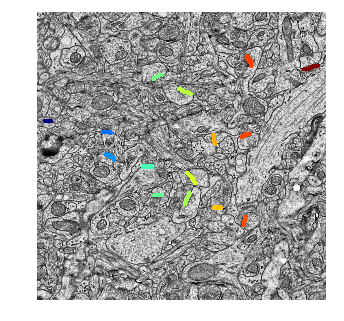

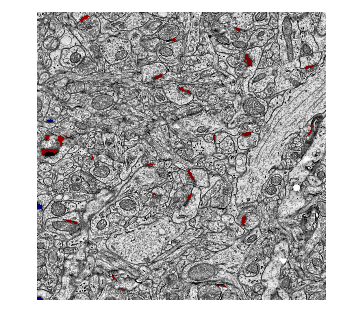

In [17]:
%matplotlib inline  
ndp.plot(im,truth,slice = 9)
ndp.plot(im,detect, slice = 9)

In [18]:
#ndp.assess.save_movie(im, detect, outFile='test_detect.mp4')
#np.save('detect_mp4.npy',detect)